# TSP with Hill Climbing
---

In [1]:
%pip install numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np

import json
import copy
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [45]:
"""Read input data and define helper functions for visualization."""

# Map services and data available from U.S. Geological Survey, National Geospatial Program.
# Please go to http://www.usgs.gov/visual-id/credit_usgs.html for further information
map = mpimg.imread("map.png")  # US States & Capitals map

# List of 30 US state capitals and corresponding coordinates on the map
with open('capitals.json', 'r') as capitals_file:
    capitals = json.load(capitals_file)
capitals_list = list(capitals.items())


def show_path(path, starting_city, w=12, h=8):
    """Plot a TSP path overlaid on a map of the US States & their capitals."""
    x, y = list(zip(*path))
    _, (x0, y0) = starting_city
    plt.imshow(map)
    # y* = yellow star for starting point
    plt.scatter(x0, y0, marker='*', s=300, zorder=1, color="red")
    # include the starting point at the end of path
    plt.plot(x + x[:1], y + y[:1], zorder=0, marker="s", markersize=7)
    plt.axis("off")
    fig = plt.gcf()
    fig.set_size_inches([w, h])

In [3]:
def manhattan(x,y):
    return (abs(x[0]-y[0]) + abs(x[1]-y[1])) 


class TravelingSalesmanProblem:
    """Representation of a traveling salesman optimization problem.  The goal
    is to find the shortest path that visits every city in a closed loop path.
    
    Students should only need to implement or modify the successors() and
    get_values() methods.
    
    Parameters
    ----------
    cities : list
        A list of cities specified by a tuple containing the name and the x, y
        location of the city on a grid. e.g., ("Atlanta", (585.6, 376.8))
    
    Attributes
    ----------
    names
    coords
    path : list
        The current path between cities as specified by the order of the city
        tuples in the list.
    """
    def __init__(self, cities):
        self.path = copy.deepcopy(cities)
    
    def copy(self):
        """Return a copy of the current board state."""
        new_tsp = TravelingSalesmanProblem(self.path)
        return new_tsp
    
    @property
    def names(self):
        """Strip and return only the city name from each element of the
        path list. For example,
            [("Atlanta", (585.6, 376.8)), ...] -> ["Atlanta", ...]
        """
        names, _ = zip(*self.path)
        return names
    
    @property
    def coords(self):
        """Strip the city name from each element of the path list and return
        a list of tuples containing only pairs of xy coordinates for the
        cities. For example,
            [("Atlanta", (585.6, 376.8)), ...] -> [(585.6, 376.8), ...]
        """
        _, coords = zip(*self.path)
        return coords
    
    def successors(self):
        """Return a list of states in the neighborhood of the current state by
        switching the order in which any adjacent pair of cities is visited.
        
        For example, if the current list of cities (i.e., the path) is [A, B, C, D]
        then the neighbors will include [A, B, D, C], [A, C, B, D], [B, A, C, D],
        and [D, B, C, A]. (The order of successors does not matter.)
        
        In general, a path of N cities will have N neighbors (note that path wraps
        around the end of the list between the first and last cities).

        Returns
        -------
        list<Problem>
            A list of TravelingSalesmanProblem instances initialized with their list
            of cities set to one of the neighboring permutations of cities in the
            present state
        """
        successors = []
        for i in range(len(self.path)-1):
            new_path = self.copy()
            new_path.path[i], new_path.path[i+1] = new_path.path[i+1], new_path.path[i]
            successors.append(new_path)
            
        last_path = self.copy()
        last_path.path[0], last_path.path[-1] = last_path.path[-1], last_path.path[0]
        successors.append(last_path)
        
        return successors 
        
    def get_value(self):
        """Calculate the total length of the closed-circuit path of the current
        state by summing the distance between every pair of adjacent cities.  Since
        the default simulated annealing algorithm seeks to maximize the objective
        function, return -1x the path length. (Multiplying by -1 makes the smallest
        path the smallest negative number, which is the maximum value.)
        
        Returns
        -------
        float
            A floating point value with the total cost of the path given by visiting
            the cities in the order according to the self.cities list
        
        Notes
        -----
            (1) Remember to include the edge from the last city back to the
            first city

        """
        
        length = 0
        coords = self.coords
        for i in range(len(coords)-1):
            length += manhattan(coords[i], coords[i+1])
            
        length += manhattan(coords[0], coords[-1])
        return -length

In [12]:
def hill_climbing(problem: TravelingSalesmanProblem) -> TravelingSalesmanProblem:
    iterations = 0
    current = problem
    neighborhood = current.successors()
    best_neighbor_index = np.argmax([x.get_value() for x in neighborhood]) # Find the closest neighbour
    next_state = neighborhood[best_neighbor_index] # Move to the next state
    delta_E = next_state.get_value() - current.get_value()
    
    # While there is still a notable change from the last state to the next, repeat the above from the new state
    while delta_E > 0 and iterations < np.inf:
        current = next_state
        neighborhood = current.successors()
        best_neighbor_index = np.argmax([x.get_value() for x in neighborhood])
        next_state = neighborhood[best_neighbor_index]
        delta_E = next_state.get_value() - current.get_value()
        iterations += 1
    return current

Initial path value: 1643.20
[('Oklahoma City', [392.8, 356.4]), ('Montgomery', [559.6, 404.8]), ('Saint Paul', [451.6, 186.0]), ('Trenton', [698.8, 239.6]), ('Salt Lake City', [204.0, 243.2])]


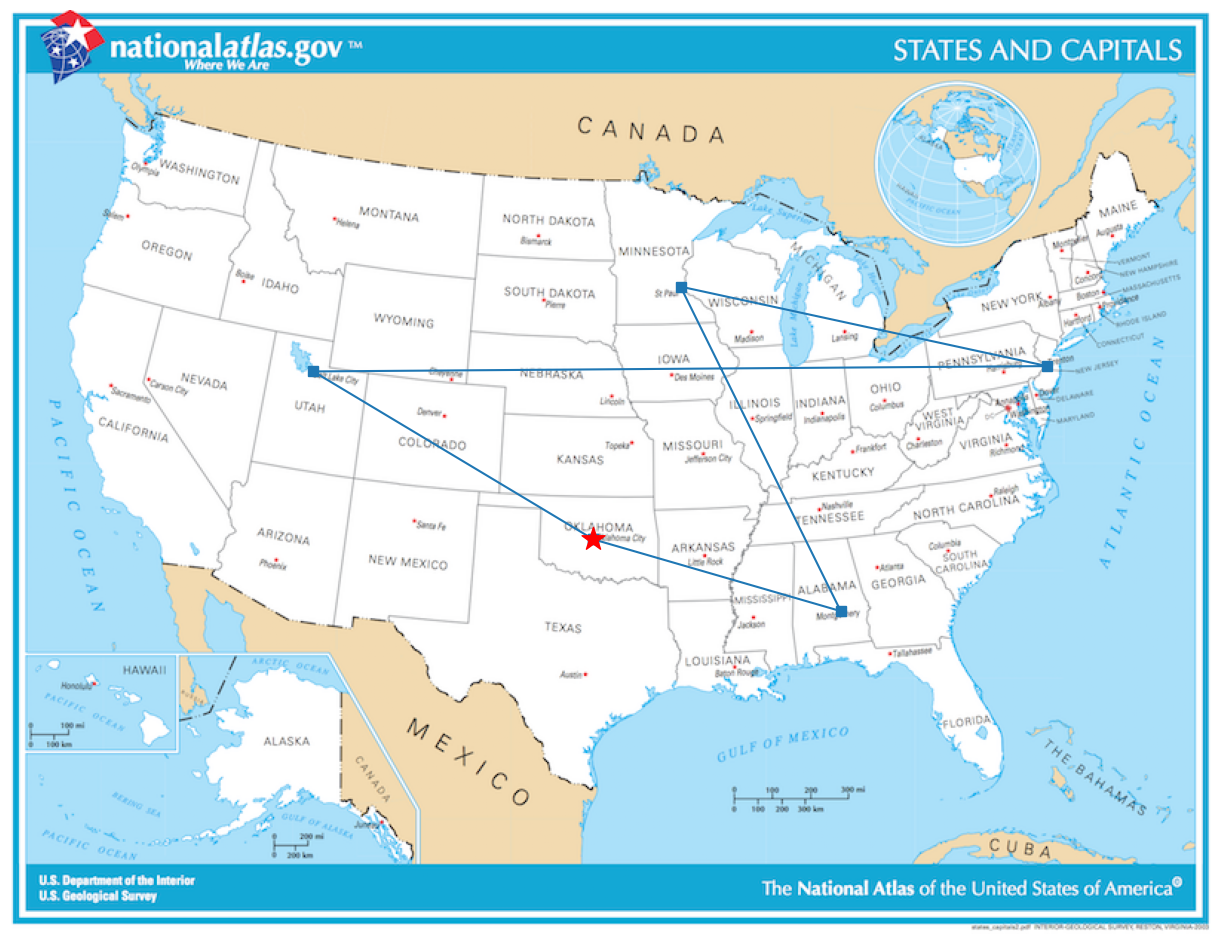

In [49]:
# Create the problem instance and plot the initial state
num_cities = 5
capitals_tsp = TravelingSalesmanProblem(capitals_list[:num_cities])
starting_city = capitals_list[0]
print("Initial path value: {:.2f}".format(-capitals_tsp.get_value()))
print(capitals_list[:num_cities])  # The start/end point is indicated with a yellow star
show_path(capitals_tsp.coords, starting_city, 16, 12)